<a href="https://www.kaggle.com/code/arnabmukherjee853/revenue-prediction?scriptVersionId=168252453" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/r-prediction/revenue_prediction.csv


In [2]:
df=pd.read_csv('/kaggle/input/r-prediction/revenue_prediction.csv')
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [4]:
df.drop(columns=['Id'],inplace=True)

In [5]:
df.columns

Index(['Name', 'Franchise', 'Category', 'City', 'No_Of_Item', 'Order_Placed',
       'Revenue'],
      dtype='object')

In [6]:
df.describe()

,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,1.000000e+02
mean,49.080000,4.086000,4.395161e+06
std,22.370923,2.055101,2.659932e+06
min,18.000000,1.000000,8.498700e+05
25%,34.750000,2.750000,2.688328e+06
50%,45.000000,3.650000,3.911401e+06
75%,57.250000,5.100000,5.330084e+06
max,126.000000,13.000000,1.969694e+07


<Axes: >

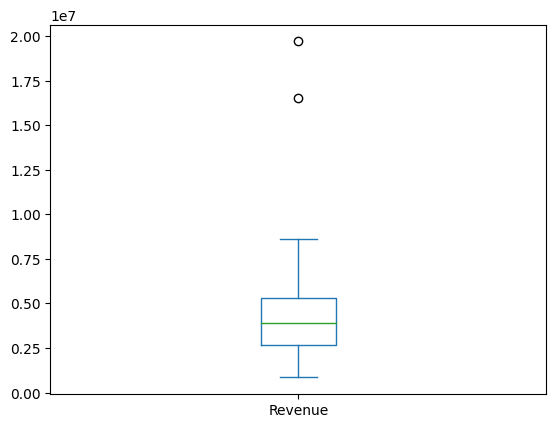

In [7]:
df['Revenue'].plot(kind='box')

<Axes: >

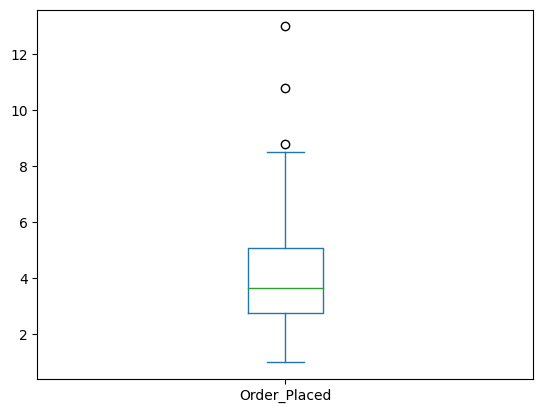

In [8]:
df['Order_Placed'].plot(kind='box')

<Axes: >

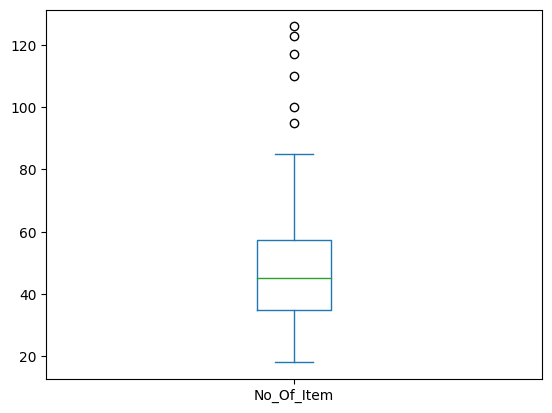

In [9]:
df['No_Of_Item'].plot(kind='box')

In [10]:
for i in df.columns:
    if df[i].dtypes=='object':
        col1=df[i].nunique()
        print(f"Number of unique values in column {i}: {col1}")
        print(f"Value counts for column '{i}:\n{df[i].value_counts()}")
        print('\n\nNext Column Details')
    

Number of unique values in column Name: 100
Value counts for column 'Name:
Name
HungryHowie'sPizza                 1
Sbarro                             1
J.Alexander's                      1
UnoPizzeria&Grill                  1
Cinnabon                           1
                                  ..
VillageInn                         1
NinetyNineRestaurants              1
FogodeChao                         1
OnTheBorderMexicanGrill&Cantina    1
Mimi'sBistro&Bakery                1
Name: count, Length: 100, dtype: int64


Next Column Details
Number of unique values in column Franchise: 2
Value counts for column 'Franchise:
Franchise
Yes    55
No     45
Name: count, dtype: int64


Next Column Details
Number of unique values in column Category: 20
Value counts for column 'Category:
Category
Varied Menu        16
Mexican            10
Pizza               9
Steak               7
Family Style        7
Burger              7
Sandwich            7
Italian/Pizza       7
Bakery Cafe         5
BB

In [11]:
df.columns

Index(['Name', 'Franchise', 'Category', 'City', 'No_Of_Item', 'Order_Placed',
       'Revenue'],
      dtype='object')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

**Visualization of Target wrt Features**

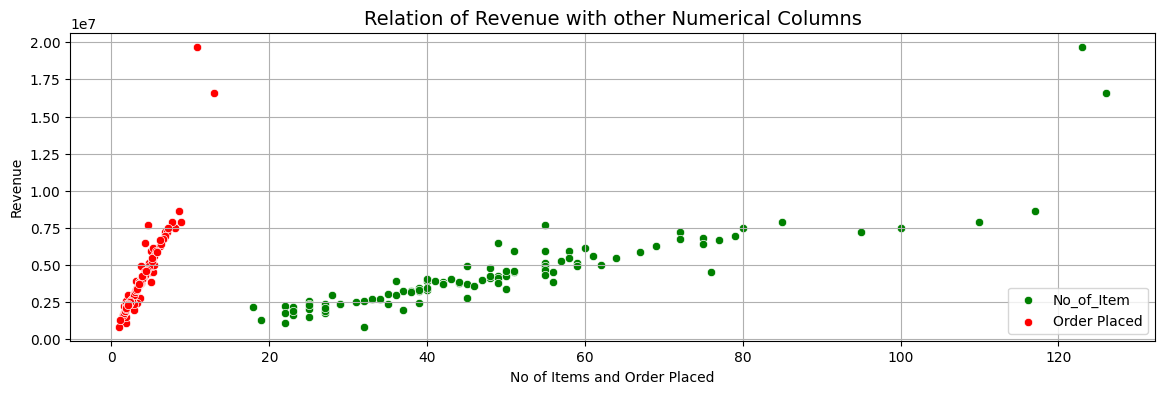

In [13]:
fig,ax=plt.subplots(1,1,figsize=(14,4))
sns.scatterplot(data=df,x=df['No_Of_Item'],y=df['Revenue'],color='green',label='No_of_Item',ax=ax)
sns.scatterplot(data=df,x=df['Order_Placed'],y=df['Revenue'],color='red',label='Order Placed',ax=ax)
ax.set(xlabel='No of Items and Order Placed',ylabel='Revenue')
ax.set_title('Relation of Revenue with other Numerical Columns',fontsize=14)
ax.grid(True)

<Axes: xlabel='City', ylabel='count'>

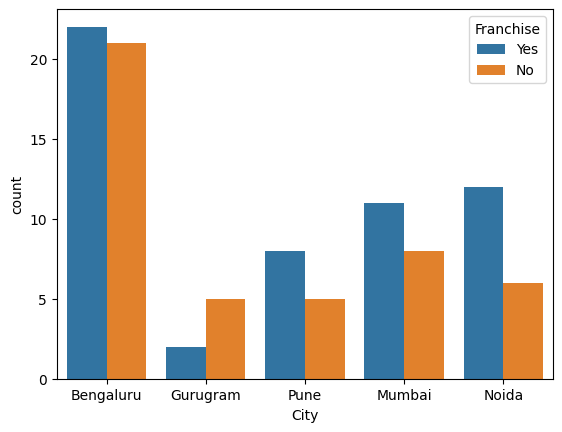

In [14]:
sns.countplot(data=df,x=df['City'],hue='Franchise')

In [15]:
df.head()

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [16]:
df.City.unique()

array(['Bengaluru', 'Gurugram', 'Pune', 'Mumbai', 'Noida'], dtype=object)

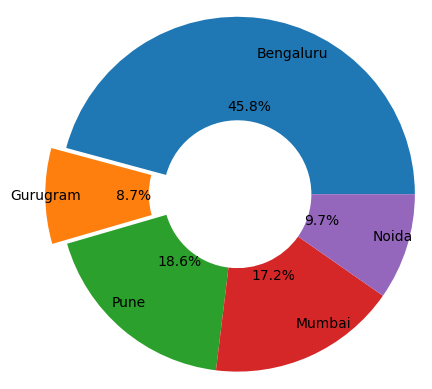

In [17]:
CRev=df.groupby(['City'])['Revenue'].sum().values
plt.pie(x=CRev,
        autopct='%0.1f%%',radius=1.2,
        pctdistance=0.5,
        explode=(0,0.1,0,0,0),
        labels=['Bengaluru','Gurugram','Pune','Mumbai','Noida'],
        labeldistance=0.8,
        wedgeprops=dict(width=.7))
plt.show()

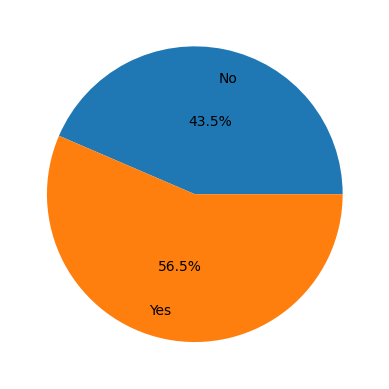

In [18]:
FRev=df.groupby(['Franchise'])['Revenue'].sum().values
plt.pie(x=FRev,
        autopct='%0.1f%%',
        pctdistance=0.5,
        explode=(0,0),
        startangle=0,
        labels=['No','Yes'],
        labeldistance=0.8)
plt.show()
        

In [19]:
Rev_category=df.groupby(['Category'])['Revenue'].sum()
Rev_category

Category
Asian               7513524
Asian/Noodle        8856139
BBQ                22169931
Bakery Cafe        28749002
Burger             38548779
Chicken             6805932
Coffee Cafe         4593278
Family Casual      12146872
Family Style       25132641
Frozen Desserts     8499372
Healthy             5966193
Italian/Pizza      21234283
Mexican            36817925
Pizza              38469999
Sandwich           28032069
Seafood            17964022
Snack               6863260
Sports Bar          3194559
Steak              29798662
Varied Menu        88159648
Name: Revenue, dtype: int64

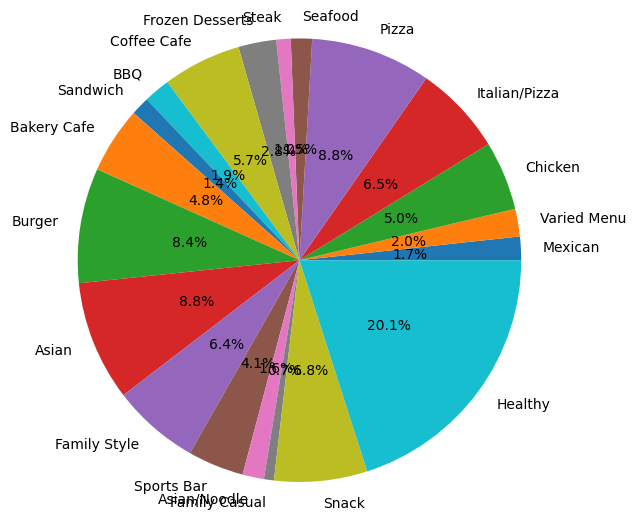

In [20]:
CtRev=df.groupby(['Category'])['Revenue'].sum().values
plt.pie(x=CtRev,
        autopct='%0.1f%%',
        radius=1.5,
        pctdistance=.5,
        labels=df.Category.unique(),
        labeldistance=1.1)
plt.show()

In [21]:
df.City.value_counts()

City
Bengaluru    43
Mumbai       19
Noida        18
Pune         13
Gurugram      7
Name: count, dtype: int64

In [22]:
New_df=df.groupby(['City'])['Franchise'].value_counts()
New_df

City       Franchise
Bengaluru  Yes          22
           No           21
Gurugram   No            5
           Yes           2
Mumbai     Yes          11
           No            8
Noida      Yes          12
           No            6
Pune       Yes           8
           No            5
Name: count, dtype: int64

In [23]:
New_df.values

array([22, 21,  5,  2, 11,  8, 12,  6,  8,  5])

In [24]:
New_df.index.get_level_values(1)

Index(['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'], dtype='object', name='Franchise')

In [25]:
a=np.array([22,21,11,8,12,6,8,5,5,2])  # rearanging 'New_df.index.get_level_values(1)' to match the order list of 1st pie.

In [26]:
Labels=np.array(['Yes','No','Yes','No','Yes','No','Yes','No','No','Yes'])

In [27]:
df.City.value_counts()

City
Bengaluru    43
Mumbai       19
Noida        18
Pune         13
Gurugram      7
Name: count, dtype: int64

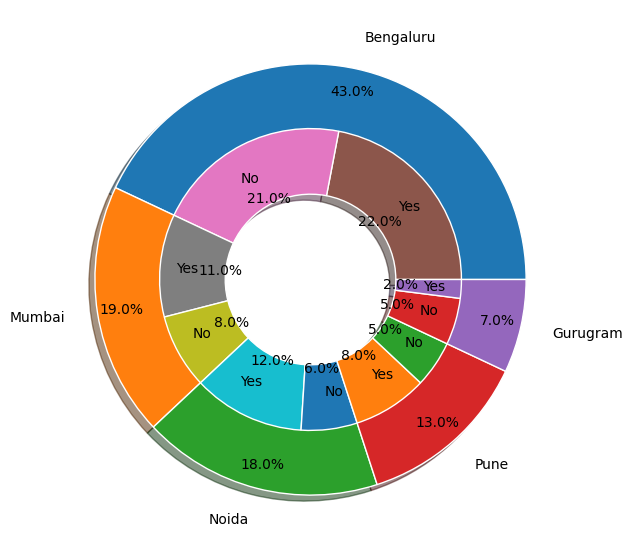

In [28]:
fig,ax=plt.subplots(figsize=(10,7))
size=0.35
ax.pie(df.City.value_counts(),radius=1,
      labels=['Bengaluru','Mumbai','Noida','Pune','Gurugram'],
      autopct='%1.1f%%',
      pctdistance=.89,
      wedgeprops=dict(width=size,edgecolor='white'),
      labeldistance=1.15,
      shadow=True)
ax.pie(a,radius=0.7,
      autopct='%1.1f%%',
      pctdistance=.6,
      labels=Labels,
      labeldistance=0.75,
      wedgeprops=dict(width=size/1.15,edgecolor='white'),
      shadow=True)
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          100 non-null    object 
 1   Franchise     100 non-null    object 
 2   Category      100 non-null    object 
 3   City          100 non-null    object 
 4   No_Of_Item    100 non-null    int64  
 5   Order_Placed  100 non-null    float64
 6   Revenue       100 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [30]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [31]:
Le=LabelEncoder()
SC=StandardScaler()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=Le.fit_transform(df[i])

In [32]:
df.drop(columns=['Name'],inplace=True)

In [33]:
df.describe()

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
count,100.00,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,0.55,11.480000,1.510000,49.080000,4.086000,4.395161e+06
std,0.50,5.675537,1.507523,22.370923,2.055101,2.659932e+06
min,0.00,0.000000,0.000000,18.000000,1.000000,8.498700e+05
25%,0.00,7.000000,0.000000,34.750000,2.750000,2.688328e+06
50%,1.00,12.000000,1.500000,45.000000,3.650000,3.911401e+06
75%,1.00,16.250000,3.000000,57.250000,5.100000,5.330084e+06
max,1.00,19.000000,4.000000,126.000000,13.000000,1.969694e+07


In [34]:
#df.drop(columns=['Category'],inplace=True)

In [35]:
df.head()

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,1,12,0,55,5.5,5953753
1,0,19,1,72,6.8,7223131
2,1,5,4,25,1.9,2555379
3,1,11,2,18,2.5,2175511
4,1,13,3,48,4.2,4816715


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
#df[['No_Of_Item','Order_Placed']]=SC.fit_transform(df[['No_Of_Item','Order_Placed']])

In [38]:
df.columns

Index(['Franchise', 'Category', 'City', 'No_Of_Item', 'Order_Placed',
       'Revenue'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Franchise     100 non-null    int64  
 1   Category      100 non-null    int64  
 2   City          100 non-null    int64  
 3   No_Of_Item    100 non-null    int64  
 4   Order_Placed  100 non-null    float64
 5   Revenue       100 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 4.8 KB


**Checking VIF for Multi-Colinearity**

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
cols=[]
for i in df.columns:
    if ((df[i].dtype!='object') & (i!='Revenue')):
        cols.append(i)
X=df[cols]
VIF_info=pd.DataFrame()
VIF_info['Features']=X.columns
VIF_info['VIF']=[variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
VIF_info

,Features,VIF
0,Franchise,2.023259
1,Category,3.854742
2,City,1.960766
3,No_Of_Item,109.458973
4,Order_Placed,97.294515


In [41]:
df.drop(columns=['No_Of_Item'],inplace=True)

In [42]:
cols=[]
for i in df.columns:
    if ((df[i].dtype!='object') & (i!='Revenue')):
        cols.append(i)
X=df[cols]
VIF_info=pd.DataFrame()
VIF_info['Features']=X.columns
VIF_info['VIF']=[variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
VIF_info

,Features,VIF
0,Franchise,2.012094
1,Category,3.411032
2,City,1.933192
3,Order_Placed,3.305379


In [43]:
X=df[['Franchise','Category','City','Order_Placed']]
Y=df['Revenue']
X.shape

(100, 4)

In [44]:
Y.shape

(100,)

In [45]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.25,random_state=15)
lr=LinearRegression()
lr.fit(Xtrain,Ytrain)
y_pred=lr.predict(Xtest)
table=pd.DataFrame(np.c_[Ytest,y_pred],columns=['Original','Predicted'])
table.head()

,Original,Predicted
0,4250553.0,4.432662e+06
1,3028267.0,2.914828e+06
2,3258837.0,3.084234e+06
3,3273041.0,3.051096e+06
4,4250758.0,4.627166e+06


In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

In [47]:
print(mean_squared_error(Ytest,y_pred))
print(mean_absolute_error(Ytest,y_pred))
print('Root mean squared error',np.sqrt(mean_squared_error(Ytest,y_pred)))
print('Mean absolure Percentage Error is:',mean_absolute_percentage_error(Ytest,y_pred))
print('R2 Score is:',r2_score(Ytest,y_pred))

365084291195.9187
444740.941345464
Root mean squared error 604222.0545427969
Mean absolure Percentage Error is: 0.1475069759173914
R2 Score is: 0.8388371629429227


**Decision Tree Regressor**

In [48]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(Xtrain,Ytrain)
Y_pred=DTR.predict(Xtest)
table_dt=pd.DataFrame(np.c_[Ytest,Y_pred],columns=['Original','Predicted_dt'])
table_dt.head()

,Original,Predicted_dt
0,4250553.0,4956086.0
1,3028267.0,1999068.0
2,3258837.0,3351383.0
3,3273041.0,3347767.0
4,4250758.0,4264176.0


In [49]:
print(mean_squared_error(Ytest,Y_pred))
print(mean_absolute_error(Ytest,Y_pred))
print('Root mean squared error',np.sqrt(mean_squared_error(Ytest,Y_pred)))
print('Mean absolure Percentage Error is:',mean_absolute_percentage_error(Ytest,Y_pred))
print('R2 Score is:',r2_score(Ytest,Y_pred))

670789096222.8
602931.6
Root mean squared error 819017.1525815561
Mean absolure Percentage Error is: 0.19381678818630313
R2 Score is: 0.7038868107414537


**Random Forest Regressor**

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
RFR=RandomForestRegressor()
param_grid = {
    'n_estimators':[5,10,20],  
    'max_depth':[None,10,20],     
    'min_samples_split':[5,10,12]}
grid_search=GridSearchCV(RFR,param_grid,cv=5)
grid_search.fit(Xtrain,Ytrain)
best_RFR=grid_search.best_estimator_

Y_Pred=best_RFR.predict(Xtest)
table_RF=pd.DataFrame(np.c_[Ytest,Y_Pred],columns=['Original','Predicted_RF'])
table_RF.head()

,Original,Predicted_RF
0,4250553.0,4.343887e+06
1,3028267.0,2.508518e+06
2,3258837.0,3.294232e+06
3,3273041.0,3.223260e+06
4,4250758.0,4.375246e+06


In [51]:
print(mean_squared_error(Ytest,Y_Pred))
print(mean_absolute_error(Ytest,Y_Pred))
print('Root mean squared error',np.sqrt(mean_squared_error(Ytest,Y_Pred)))
print('Mean absolure Percentage Error is:',mean_absolute_percentage_error(Ytest,Y_Pred))
print('R2 Score is:',r2_score(Ytest,Y_Pred))

395271993693.1077
461649.11313412694
Root mean squared error 628706.603824954
Mean absolure Percentage Error is: 0.16694237020672528
R2 Score is: 0.8255111012744101
